# State-space analyses

Written by Ladislas Nalborczyk (ladislas.nalborczyk@gmail.com). Last updated on February 1, 2024.

In [4]:
!yes | pip uninstall meg_decoding_tools
! pip install git+https://github.com/lnalborczyk/meg_decoding_tools
! pip install git+https://github.com/mitchellostrow/DSA

Found existing installation: meg_decoding_tools 0.0.1
Uninstalling meg_decoding_tools-0.0.1:
  Would remove:
    /Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meeg/*
    /Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meg_decoding_tools-0.0.1.dist-info/*
Proceed (Y/n)?   Successfully uninstalled meg_decoding_tools-0.0.1
yes: stdout: Broken pipe
  Cloning https://github.com/lnalborczyk/meg_decoding_tools to /private/var/folders/yp/p14xyqpj5l3bnhqhhfk5qhqr0000gn/T/pip-req-build-qt13ljoy
  Running command git clone --filter=blob:none --quiet https://github.com/lnalborczyk/meg_decoding_tools /private/var/folders/yp/p14xyqpj5l3bnhqhhfk5qhqr0000gn/T/pip-req-build-qt13ljoy
  Resolved https://github.com/lnalborczyk/meg_decoding_tools to commit f9cf139331737d85cdc3b459b8c00fb707060b30
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel 

In [10]:
import mne
import numpy as np
from meeg.latent import compare_pca_through_time
from meeg.plots import compare_neural_trajectories_2d, compare_neural_trajectories_3d

In [6]:
# importing the examplary data (MNE epochs of MEG data)
visual_4l2s = mne.read_epochs("../src/meeg/data/visual_4l2s-epo.fif")
visual_7l2s = mne.read_epochs("../src/meeg/data/visual_7l2s-epo.fif")

Reading /Users/ladislas/Desktop/meg_decoding_tools/examples/../src/meeg/data/visual_4l2s-epo.fif ...


    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
160 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/ladislas/Desktop/meg_decoding_tools/examples/../src/meeg/data/visual_7l2s-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
159 matching events found
No baseline correction applied
0 projection items activated


In [7]:
# computing average neural trajectories (and across-trial SD) in a common PCA space
epochs1_pca, epochs1_pca_std, epochs2_pca, epochs2_pca_std = compare_pca_through_time(visual_4l2s, visual_7l2s, n_components=10)
print(epochs1_pca.shape)

Adding metadata with 13 columns
319 matching events found
No baseline correction applied


/Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meeg/latent/trajectories.py:42: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials1 = epochs1.get_data()
/Users/ladislas/Desktop/meg_decoding_tools/.venv/lib/python3.10/site-packages/meeg/latent/trajectories.py:43: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials2 = epochs2.get_data()


(251, 10)


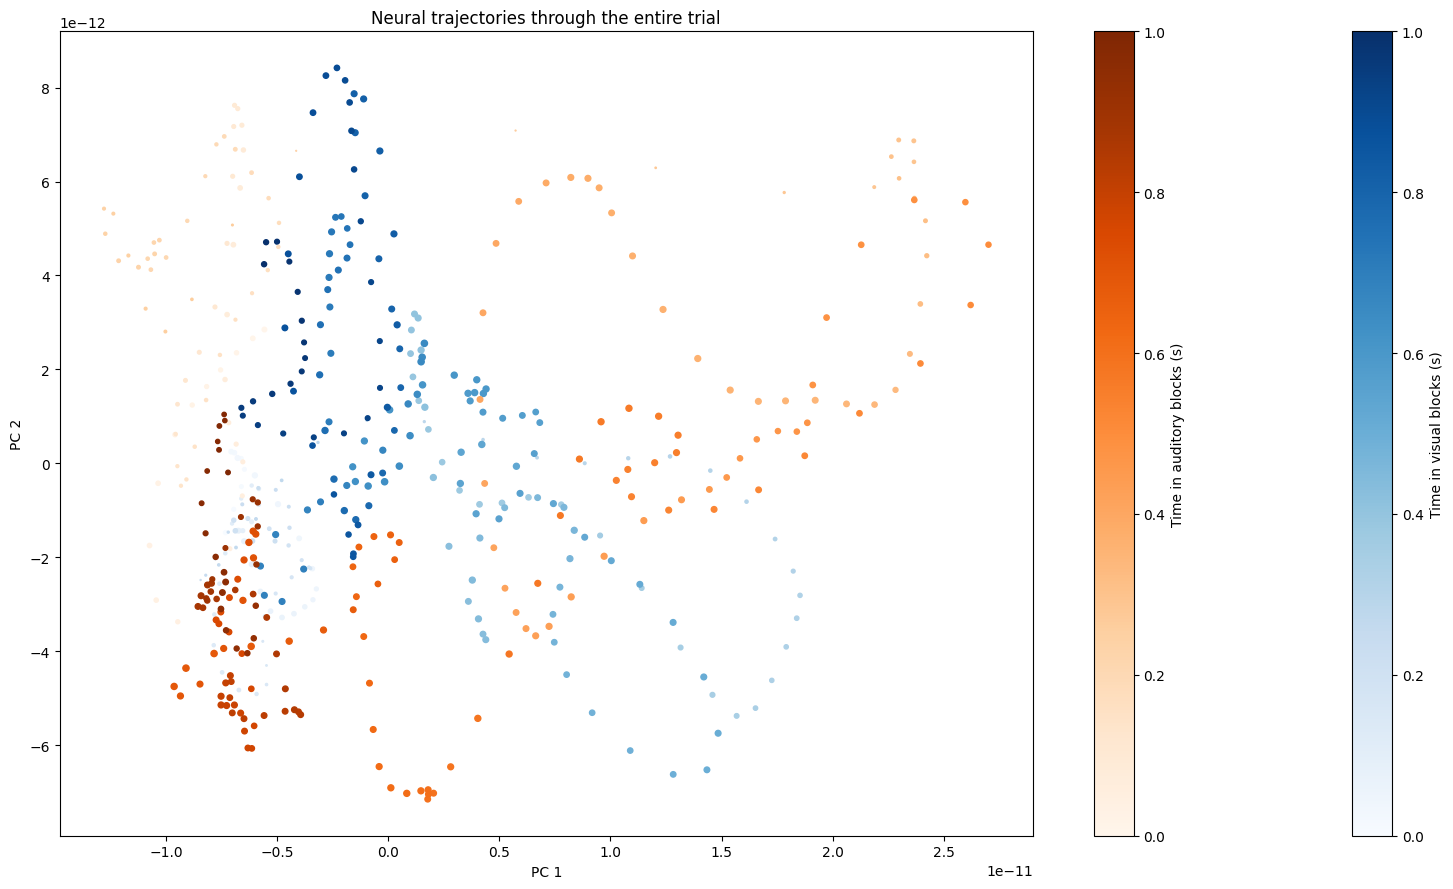

In [9]:
compare_neural_trajectories_2d(
    x_pca1=epochs1_pca, x_pca2=epochs2_pca,
    x_pca_std1=epochs1_pca_std, x_pca_std2=epochs2_pca_std,
    fs=1/250,
    plot_title="Neural trajectories through the entire trial"
    );

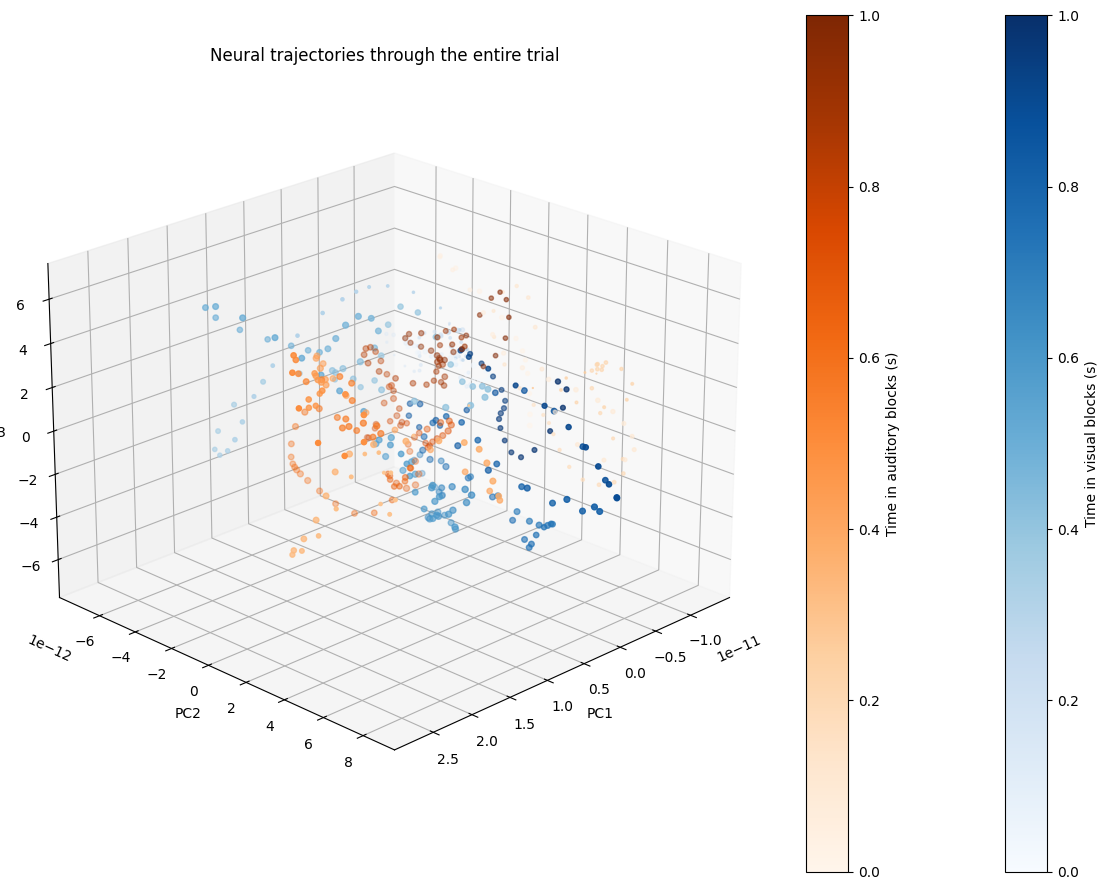

In [11]:
compare_neural_trajectories_3d(
    x_pca1=epochs1_pca, x_pca2=epochs2_pca,
    x_pca_std1=epochs1_pca_std, x_pca_std2=epochs2_pca_std,
    fs=1/250,
    plot_title="Neural trajectories"
    );